<a href="https://colab.research.google.com/github/ShodekeA/MyProjects/blob/main/04_2_EDA_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* describe a standard EDA workflow
* EXTRA: describe a standard communication & reporting process
* write a program which uses pandas to:
    * obtain a subset of columns using list indexes
    * obtain a subset of rows using locator syntax  
    * obtain descriptive statistics 
    * applies a test to a column to discretize it
    * factor a continuous column with a discrete column
* write a program which uses seaborn and matplotlib to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 1: What is EDA?

## What is Exploratory Data Analysis?

* goal:
    * investigate
    * explain
    * describe
    * understand

* questions?
    * is there enough data?
    * is the data correct?
    * what is the distribution of each column?
    * how do the columns correlate?

* method
    * visual
    * primarily descriptive

## What are the tools for EDA in Python?

Simple pair: Pandas for data exploration, seaborn for visualization.


...but lots of options. 

## What are the challenges around EDA?

### Challenges of EDA:

* Strategic 
* Organizational
* Technical 

# Part 2: EDA with Pandas

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/a-forty-two/DFE6/main/titanic.csv')


In [4]:
import seaborn as sns

## How do we EDA with Pandas?

* data quality, structure, etc. metrics; $\rightarrow$ `.info()`
* descriptive stats for all single columns; $\rightarrow$ `.describe()`, `.mean()`, `.value_counts()`
* descriptive stats for all pairs of columns; $\rightarrow$ `.corr()`
* domain-specific row subsets; $\rightarrow$ `df.loc`
* introduce factoring columns; $\rightarrow$ `.groupby`
* introduce domain-specific novel columns; $\rightarrow$ `df['bmi'] = df['w'] / df['h'] ** 2`

    

The purpose of computing a correlation score (default: pearson) is to determine *possible* relationships, rather than accurately measure correlation.

Note the *sign* of the score, and it's rough magnitude. You should plot all columns and pairs *regardless*. 

## Exercise (20 min)

Perform an EDA of the titanic dataset with pandas, include:

* data quality, structure, etc. metrics
    * `.info()`, `.isna().sum()`, etc.
* descriptive stats for all single columns
    * `.describe()`, `.mean()`, `.median()`, `.std()`, `.value_counts()`
* descriptive stats for all pairs of columns
    * ie., `.corr()`

In [ ]:
df.info()

In [ ]:
df.isna().sum()

In [ ]:
df

In [3]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.mean()

In [ ]:
df.median()

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

In [9]:
df.value_counts()

In [11]:
crr = df.corr()
crr

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


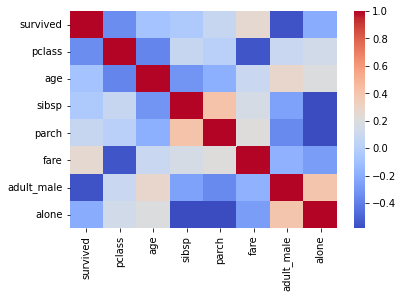

In [12]:
sns.heatmap(crr, cmap='coolwarm')